### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

### Part I - Importing the Dataset

In [2]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Select versicolor and virginica petal length and petal width features
X = df.loc[(df[4]=='Iris-versicolor') | (df[4]=='Iris-virginica'), [2, 3]].values
y = df.loc[(df[4]=='Iris-versicolor') | (df[4]=='Iris-virginica'), 4].values
y = np.where(y == 'Iris-versicolor', 0, 1)

### Part II - Training the Logistic Regression Mode

In [4]:
# Spliting the dataset to training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

print("Labels count in y_train: ", np.bincount(y_train))
print("Labels count in y_test: ", np.bincount(y_test))

Labels count in y_train:  [35 35]
Labels count in y_test:  [15 15]


In [5]:
# Feature scaling
sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [6]:
# Training the Logistic Regression
lr = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='ovr')
lr.fit(X_train_std, y_train)

LogisticRegression(C=100.0, multi_class='ovr', random_state=1)

### Part III - Evaluate the Logistic Regression Model

In [7]:
# Misclasified samples count
y_pred = lr.predict(X_test_std)
print("Number of misclassified samples: %d" % (y_test != y_pred).sum())

Number of misclassified samples: 1


In [8]:
# Determine misclasified samples
misclassified_ndx = [i for i, (pred, actual) in enumerate(zip(y_pred, y_test)) if pred != actual]
print(f"Misclassified sample indices: {misclassified_ndx}")

Misclassified sample indices: [10]


In [9]:
# Print the probabilities that misclassified samples belong to a certain class
misclassified_probs = lr.predict_proba(X_test_std[misclassified_ndx])
print(f"Predicted Probabilities for Misclassified Samples: {misclassified_probs}")

Predicted Probabilities for Misclassified Samples: [[0.96362862 0.03637138]]


In [10]:
# Accuracy of the Logistic Regression model
print("Accuracy (predictions): %.2f" % accuracy_score(y_test, y_pred))
print("Accuracy: %.2f" % lr.score(X_test_std, y_test))

Accuracy (predictions): 0.97
Accuracy: 0.97


### Part IV - Plotting the decision regions and the Data

In [11]:
# Plot decision regions
def plot_decision_regions(X, y, classifier, test_samples, misclass_ndx, resolution=0.02):

    # Setup marker generator and colormap
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Create a mesh grid for the colormap plot
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution), np.arange(y_min, y_max, resolution))

    # Predict class labels for each point in the mesh grid
    Z = classifier.predict(np.array([xx.ravel(), yy.ravel()]).T)

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx],
                    label=cl, edgecolor='black')
    
    # Highlight test samples
    plt.scatter(test_samples[:, 0], test_samples[:, 1], c='None', edgecolor='black', alpha=1.0, linewidth=1,
                marker='o', s=100, label='test samples')
    
    # Highlight misclassified samples
    plt.scatter(X_test_std[misclass_ndx, 0], X_test_std[misclass_ndx, 1], c='None', edgecolor='red',
                alpha=1.0, linewidth=1, s=100, label='misclassified samples')

C:\Users\Barcenilla\AppData\Local\Temp\ipykernel_12632\2639740338.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=colors[idx], marker=markers[idx],


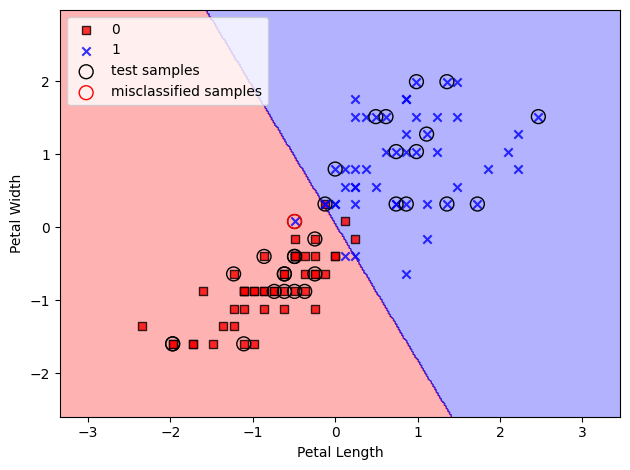

In [12]:
# Initialize variables
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X_combined_std, y_combined, lr, X_test_std, misclassified_ndx)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(loc='upper left')
plt.tight_layout()

plt.show()